# Linear Regression

In Linear Regression we're trying to understand the pattern or the slope of a given dataset. 

In simple terms we're assuming the data is in a linear pattern and we're trying to fit a straight line across all the data points so it fits the data as well as it can.

The formula for Linear Regression is:

$$
\hat y = wx + b
$$

A simple demonstration in terms of a graph would be something like this:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

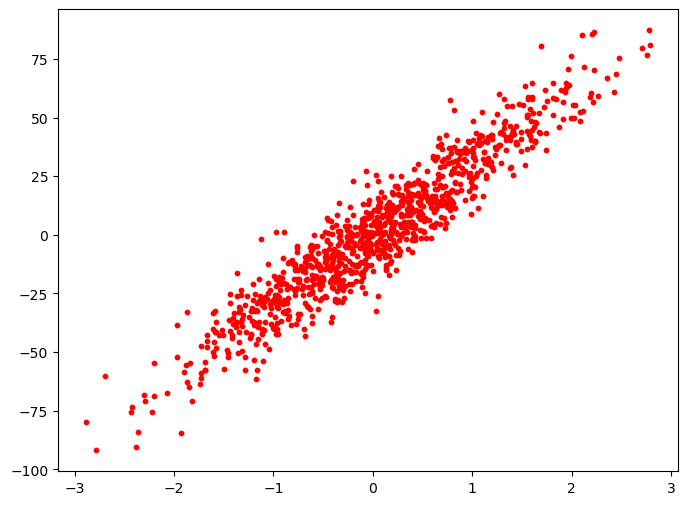

In [42]:
X, y = datasets.make_regression(n_samples = 1000, n_features = 1, noise = 10, random_state = 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 1)
fig = plt.figure(figsize = (8,6))
plt.scatter(X, y, color = 'r', s = 10);


This is the dataset we're gonna use to build the Linear Regression model. 

### Cost function

To calculate the error of Linear Regression we use <b>Mean Squared Error</b> and it is calculated with the formula:

$$
J(w,b) = \frac{1}{2m} \sum_{i = 1}^m(f_{(w,b)}(x^{(i)}) -  y^{(i)})^2
$$

This is the cost function for this model

A cost function will basically tell us how well our model is performing. It measures the sqaured differences between our model's predicted values and the averaged over the actual values of the dataset.

### Gradient Descent

Gradient Descent can be used to minimize any function, In simple terms it is basically iteratively updates the parameter `w` and `b` in the direction it reduces the cost function $J(w,b)$

For Linear Regression we will try minimizing the <b>MSE</b> using the below formula

The formula for Gradient Descent is:

$$ \text{repeat until convergence: \{ } $$
$$
w = w - \alpha * \frac {\partial}{\partial w} J(w,b)
$$

 $$
b = b - \alpha * \frac {\partial}{\partial b} J(w,b)
$$
$$  \} $$

where 

$\alpha$: is the learning rate (The learning rate tells how fast or slow to go in the direction gradient descent tells us to go.)

$J(w,b)$: is the cost function

$ \frac {\partial}{\partial w} J(w,b)$ and $\frac {\partial}{\partial b} J(w,b)$:  are the gradients (partial derivatives)  of the cost function in respect to `w` and `b` respectively.

## Steps:

#### Training:
* Initialize weight as zero
* Initialize bias as zero

#### Given a data point:
* Predict $\hat{y} = wx + b$
* Calculate error
* Use Gradient Descent to figure out new weight (`w`) and bias (`b`)
* Repeat `n` times

#### Testing:

Given a data point:
* Put in the values from the data point into the equation $ \hat {y} = wx + b$

In [14]:
class LinearRegression:
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialze weights and bias as 0
        self.weights = np.zeros(n_features)
        self.bias = 0
        for i in range(self.n_iters):
        # To simplify the proccess of doing y = wx + b everytime we take the dot-product of the entire `X` and add bias to it
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias  - self.lr * db
        
    # Put in the values from the data point into the equation y-hat = ex + b
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred        

In [15]:
# Write a function to calculate MSE

def mse(y_test, predictions):
    return np.mean((y_test - predictions) ** 2)
    

In [16]:
# Lets try implementing the class with the dataset from sci-kit learn
reg = LinearRegression()
reg.fit(X_train ,y_train)
preds = reg.predict(X_test)

ms = mse(y_test, preds)
ms

562.7222278358657

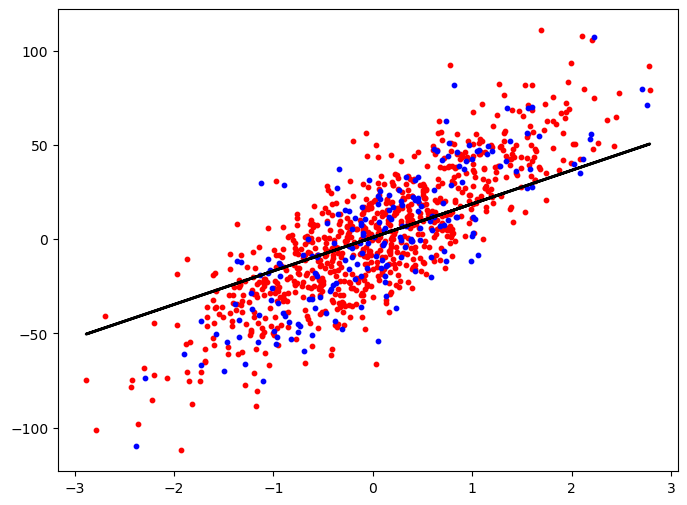

In [17]:
# Function to plot the model 
def plot_line(X, X_train, X_test, y_train, y_test):
    y_pred_line = reg.predict(X)
    cmap  = plt.get_cmap('viridis')
    fig = plt.figure(figsize = (8,6))
    # Showing the test set and the training set as two different colors
    m1 = plt.scatter(X_train, y_train, color = 'r', s = 10)
    m2 = plt.scatter(X_test, y_test, color = 'b', s = 10)
    plt.plot(X, y_pred_line, color = 'black', linewidth = 2, label = 'Pred')

plot_line(X, X_train,X_test,  y_train, y_test)

### Our line looks a little off, so I'm gonna increase the learning rate just by a bit to see how it looks

In [43]:
reg = LinearRegression(lr = 0.015)
reg.fit(X_train ,y_train)
preds = reg.predict(X_test)

ms = mse(y_test, preds)
ms

104.83149259124178

In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, preds)
print(r2)

0.8831797094442109


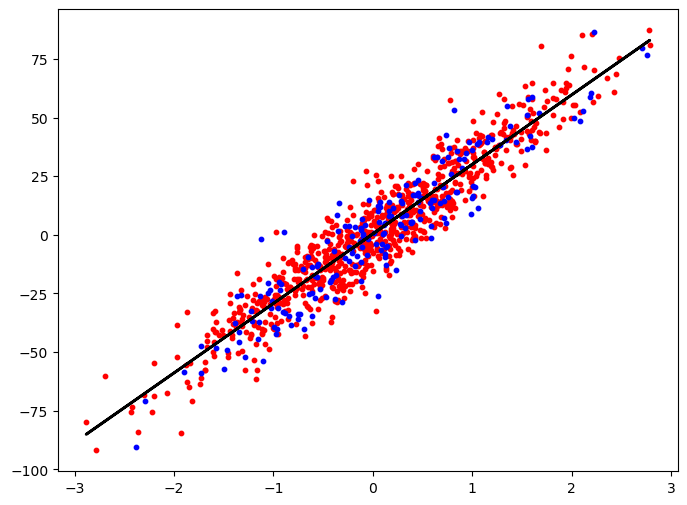

In [45]:
plot_line(X, X_train, X_test, y_train, y_test)